Calculations with materials
=========

Materials can be defined as pure elements

In [2]:
import spectrocrunch.materials.element
import spectrocrunch.materials.compoundfromformula

element = spectrocrunch.materials.element.Element("Ca")

... as compounds ...

In [3]:
import spectrocrunch.materials.compoundfromformula

compound1 = spectrocrunch.materials.compoundfromformula.CompoundFromFormula("PbSO4",density=6.29)
compound2 = spectrocrunch.materials.compoundfromformula.CompoundFromFormula("CaSO4",density=2.32)

and mixtures of compounds

In [4]:
import spectrocrunch.materials.mixture
import spectrocrunch.materials.types

mixture = spectrocrunch.materials.mixture.Mixture([compound1,compound2],[0.5,0.5],\
                                                  spectrocrunch.materials.types.fractionType.weight)

These materials can be used in a particular geometry

In [5]:
import spectrocrunch.materials.multilayer
import spectrocrunch.detectors.xrf
import spectrocrunch.geometries.xrf
import spectrocrunch.geometries.source

source = spectrocrunch.geometries.source.factory("synchrotron")
detector = spectrocrunch.detectors.xrf.factory("leia")
geometry = spectrocrunch.geometries.xrf.factory("sxm120",detectorposition=-15.,detector=detector,source=source)

sample = spectrocrunch.materials.multilayer.Multilayer(material=[element,compound1,mixture],\
                                            thickness=[1e-4,1e-4,1e-4],\
                                            geometry = geometry)

Cross sections
--------------

The main usage of the material classes is to calculate cross sections. The following cross-section are provided (back-end: xraylib/FDMNES):
 - Mass attenuation coefficient
 - Mass absorption coefficient (total photoionization cross-section)
 - Partial photoionization cross section of a shell
 - Fluorescence cross section of an emission line
 - Total scattering cross section
 - Rayleigh cross section
 - Compton cross section
 - Atomic form factor
 - Complex refractive index
 

Fluorescence cross section
--------------------------

The XRF cross section of one emission line of an element is defined as the product of
 - the partial photoionization cross section of the excited shell
 - the fluorescence yield of the excited shell
 - the radiative rate of the emission line


XRF spectra
-----------

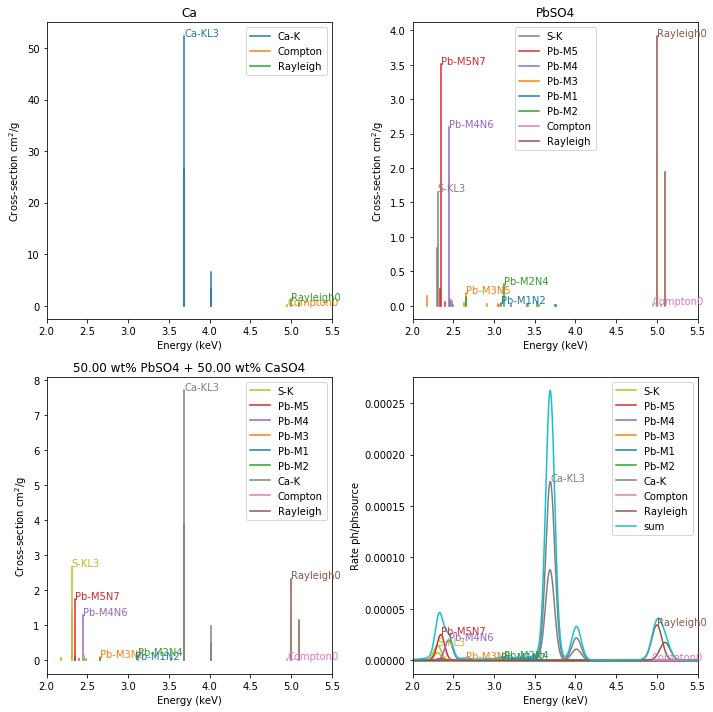

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,axs = plt.subplots(2,2,figsize=(10,10))

energy = [5,5.1]
weights = [2,1]

emin = 2
emax = 5.5

plt.axes(axs[0][0])
spectrum = element.xrayspectrum(energy,weights=weights,emin=emin,emax=emax)
spectrum.plot()

plt.axes(axs[0][1])
spectrum = compound1.xrayspectrum(energy,weights=weights,emin=emin,emax=emax)
spectrum.plot()

plt.axes(axs[1][0])
spectrum = mixture.xrayspectrum(energy,weights=weights,emin=emin,emax=emax)
spectrum.plot()

plt.axes(axs[1][1])
spectrum = sample.xrayspectrum(energy,weights=weights,emin=emin,emax=emax)
spectrum.geometry = sample.geometry
spectrum.plot()

plt.tight_layout()
plt.show()